### IDs:
Insert yours IDs to the cell below

ID #1: 327156998

ID #2:


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt

### Question 1 - Correlations (14 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

In [95]:
n = 50

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > 0.9$

In [96]:
n = 50  # number of data points

# initialize x, y
x = np.arange(n)
y = np.arange(n)

x[-1] = 1000
y[-1] = -1000

# calculate pearson correlation of x and y
pearson_1 = ss.pearsonr(x, y)[0]  # with n points
pearson_2 = ss.pearsonr(x[:-1], y[:-1])[0]  # with n-1 points

print('Pearson(x,y) with n   is {0} < -0.9'.format(pearson_1))
print('Pearson(x,y) with n-1 is {0} > 0.9'.format(pearson_2))

Pearson(x,y) with n   is -0.9801756386401246 < -0.9
Pearson(x,y) with n-1 is 0.9999999999999999 > 0.9


In [97]:
# table description of x and y with n values
df = pd.DataFrame({'x': x, 'y': y})
print("Table of x and y with n values")
print(df.describe())

# table description for x and y with n-1 values
df = pd.DataFrame({'x': x[:-1], 'y': y[:-1]})
print("Table of x and y with n-1 values")
print(df.describe())

Table of x and y with n values
                 x            y
count    50.000000    50.000000
mean     43.520000     3.520000
std     138.749847   145.504364
min       0.000000 -1000.000000
25%      12.250000    11.250000
50%      24.500000    23.500000
75%      36.750000    35.750000
max    1000.000000    48.000000
Table of x and y with n-1 values
              x         y
count  49.00000  49.00000
mean   24.00000  24.00000
std    14.28869  14.28869
min     0.00000   0.00000
25%    12.00000  12.00000
50%    24.00000  24.00000
75%    36.00000  36.00000
max    48.00000  48.00000


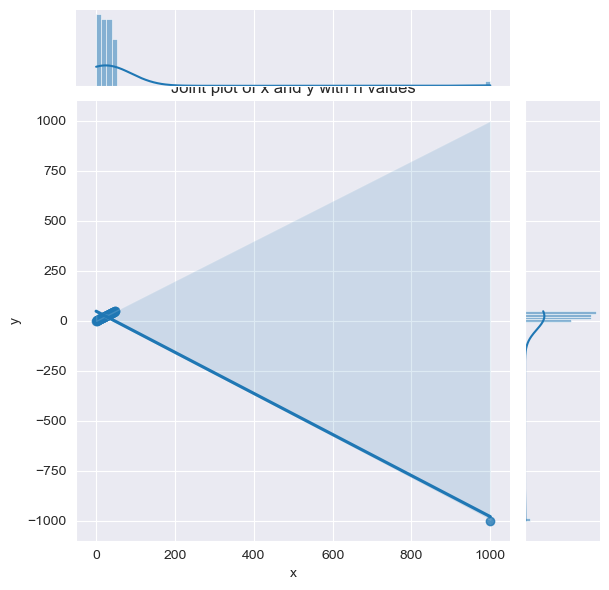

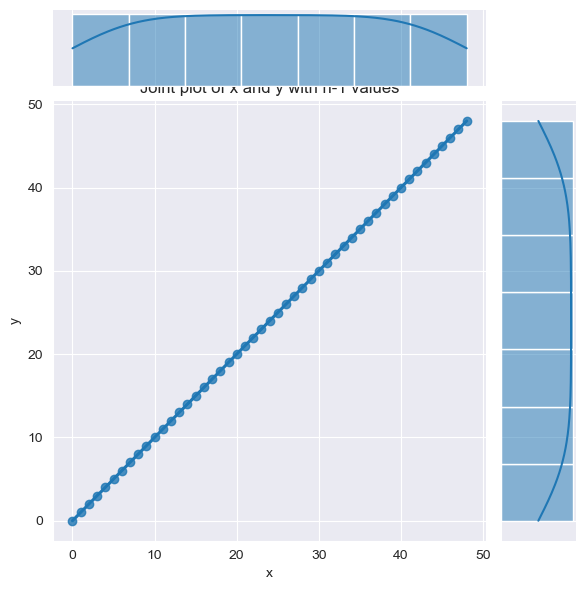

In [98]:
# joint plot of x and y with n values
data = pd.DataFrame({'x': x, 'y': y})
sns.jointplot(x='x', y='y', data=data, kind='reg')
title = 'Joint plot of x and y with n values'
plt.title(title)
plt.show()

# joint plot of x and y with n-1 values
data = pd.DataFrame({'x': x[:-1], 'y': y[:-1]})
sns.jointplot(x='x', y='y', data=data, kind='reg')
title = 'Joint plot of x and y with n-1 values'
plt.title(title)
plt.show()

#### 1.B
Data in which  $\rho(x,y) = 1$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $\rho(x_{n-1},y_{n-1}) < 0.9$

#### Answer: not possible
it is not possible, we will prove that if given data = x,y s.t
$\rho(x,y) = 1$ we get that $\rho(x_{n-1},y_{n-1}) = 1 > 0.9$

The Spearman correlation measures the monotonicity of the relationship between two variables.
as $\rho(x,y) = 1$ we conclude that the data is monotone increasing,
so no matter what point we take out the data it will still be monotone increasing,
so we will get that $\rho(x_{n-1},y_{n-1}) = 1 > 0.9$

#### 1.C
Data with τ(x,y) > ρ(x,y) + 0.45

In [99]:
n = 50

x = np.arange(n)
y = np.arange(n / 2)
y[-1] = 0
y = np.concatenate((y, np.arange(-n / 2, 0)))
#print(y)

kendall = ss.kendalltau(x, y)[0]
spearman = ss.spearmanr(x,y)[0]

print('kendall(x.y) = {} > {} = {} + 0.45 = spearman(x,y) + 0.45'.format(kendall, spearman + 0.45, spearman))

kendall(x.y) = -0.05879951490600303 > -0.07827198747489611 = -0.5282719874748961 + 0.45 = spearman(x,y) + 0.45


In [100]:
# table description of x and y
data_df = pd.DataFrame({'x': x, 'y': y})
print("Table of x and y")
print(data_df.describe())

Table of x and y
              x          y
count  50.00000  50.000000
mean   24.50000  -0.980000
std    14.57738  14.142843
min     0.00000 -25.000000
25%    12.25000 -12.750000
50%    24.50000  -0.500000
75%    36.75000  10.750000
max    49.00000  23.000000


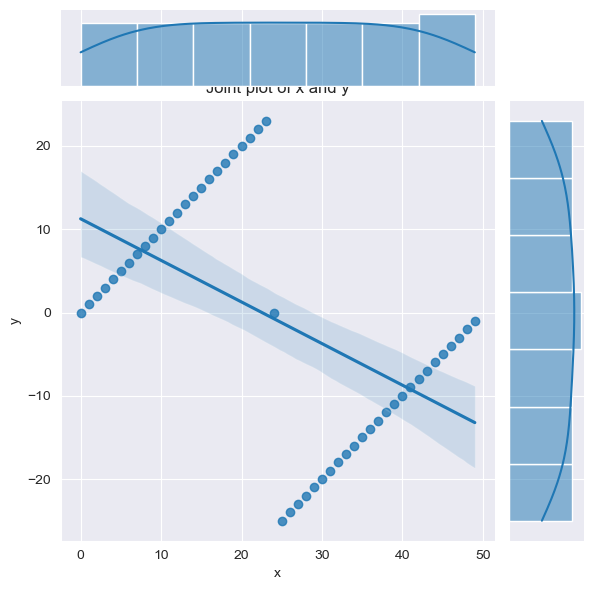

In [101]:
# joint plot of x and y
data_df = pd.DataFrame({'x': x, 'y': y})
sns.jointplot(x='x', y='y', data=data_df, kind='reg')
title = 'Joint plot of x and y'
plt.title(title)
plt.show()

#### 1.D
Data with τ(x,y) < ρ(x,y) – 0.45

In [102]:
n = 50

x = np.arange(n)
y = np.arange(n / 2)
y[-1] = 0
y = np.concatenate((y, np.arange(-n / 2, 0)))
y = np.flip(y)
#print(y)

kendall = ss.kendalltau(x, y)[0]
spearman = ss.spearmanr(x,y)[0]

print('kendall(x.y) = {} < {} = {} - 0.45 = spearman(x,y) - 0.45'.format(kendall, spearman - 0.45, spearman))

kendall(x.y) = 0.05879951490600303 < 0.07827198747489611 = 0.5282719874748961 - 0.45 = spearman(x,y) - 0.45


In [103]:
# table description of x and y
data_df = pd.DataFrame({'x': x, 'y': y})
print("Table of x and y")
print(data_df.describe())



Table of x and y
              x          y
count  50.00000  50.000000
mean   24.50000  -0.980000
std    14.57738  14.142843
min     0.00000 -25.000000
25%    12.25000 -12.750000
50%    24.50000  -0.500000
75%    36.75000  10.750000
max    49.00000  23.000000


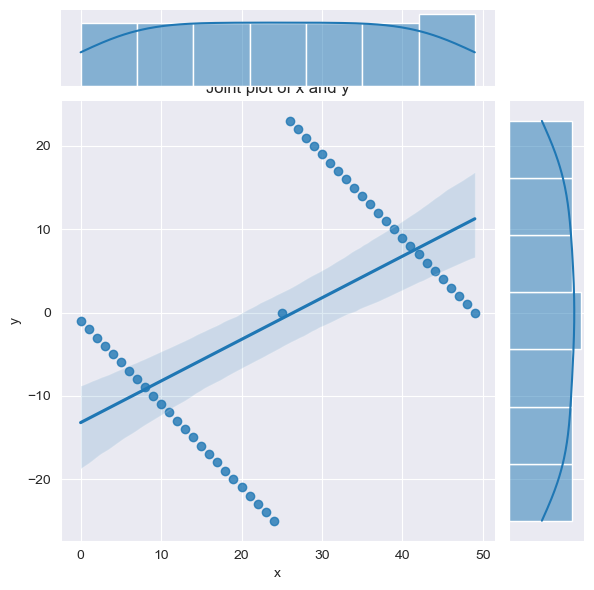

In [104]:
# joint plot of x and y
data_df = pd.DataFrame({'x': x, 'y': y})
sns.jointplot(x='x', y='y', data=data_df, kind='reg')
title = 'Joint plot of x and y'
plt.title(title)
plt.show()

#### 1.E
Data with Pearson(x,y) < ρ(x,y) – 0.6

In [105]:
n = 50

x = np.arange(n)
y = np.arange(n)
y[-1] = -1000
#print(y)




pearson = ss.pearsonr(x,y)[0]
spearman = ss.spearmanr(x, y)[0]

print('Pearson(x.y) = {} < {} = {} - 0.6 = Spearman(x,y) - 0.6'.format(pearson, spearman - 0.6, spearman))

Pearson(x.y) = -0.14709540531028992 < 0.2823529411764706 = 0.8823529411764706 - 0.6 = Spearman(x,y) - 0.6


In [106]:
# table description of x and y
data_df = pd.DataFrame({'x': x, 'y': y})
print("Table of x and y")
print(data_df.describe())



Table of x and y
              x            y
count  50.00000    50.000000
mean   24.50000     3.520000
std    14.57738   145.504364
min     0.00000 -1000.000000
25%    12.25000    11.250000
50%    24.50000    23.500000
75%    36.75000    35.750000
max    49.00000    48.000000


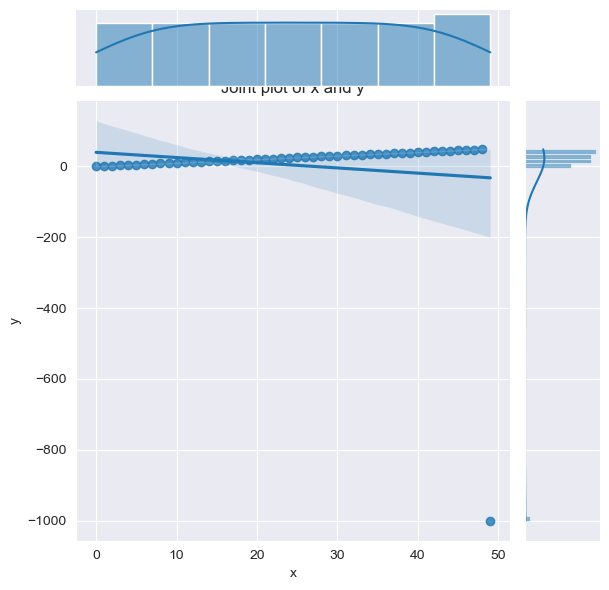

In [107]:
# joint plot of x and y
data_df = pd.DataFrame({'x': x, 'y': y})
sns.jointplot(x='x', y='y', data=data_df, kind='reg')
title = 'Joint plot of x and y'
plt.title(title)
plt.show()

#### 1.F
Data with Pearson(x,y) > ρ(x,y) + 1.2

In [108]:
n = 50

x = np.arange(n)
y = np.arange(n)
y = np.flip(y)
y[-1] = 1000
x[-1] = 1000
#print(y)




pearson = ss.pearsonr(x,y)[0]
spearman = ss.spearmanr(x, y)[0]

print('Pearson(x.y) = {} > {} = {} + 1.2 = Spearman(x,y) + 1.2'.format(pearson, spearman + 1.2, spearman))

Pearson(x.y) = 0.9792013258199657 > 0.3176470588235294 = -0.8823529411764706 + 1.2 = Spearman(x,y) + 1.2


In [109]:
# table description of x and y
data_df = pd.DataFrame({'x': x, 'y': y})
print("Table of x and y")
print(data_df.describe())


Table of x and y
                 x            y
count    50.000000    50.000000
mean     43.520000    44.500000
std     138.749847   138.609163
min       0.000000     1.000000
25%      12.250000    13.250000
50%      24.500000    25.500000
75%      36.750000    37.750000
max    1000.000000  1000.000000


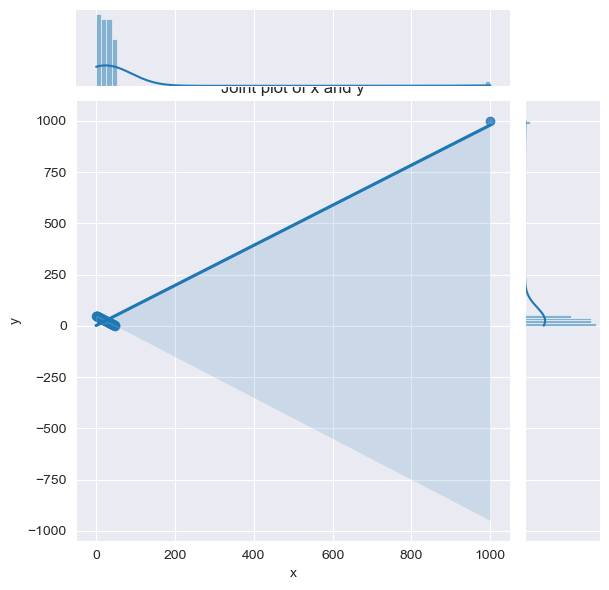

In [110]:

# joint plot of x and y
data_df = pd.DataFrame({'x': x, 'y': y})
sns.jointplot(x='x', y='y', data=data_df, kind='reg')
title = 'Joint plot of x and y'
plt.title(title)
plt.show()

#### 1.G
Data with τ(x,y) < ρ(x,y) – 1.2 

#### answer: not possible
It is impossible for the difference between Spearman's correlation and Kendall's correlation to be greater than 1.2. Both measures assess the agreement of rank orders between X and Y, with Spearman focusing on monotonicity and Kendall considering concordant and discordant pairs. While they can have different values and even opposite signs, they are closely related and cannot have such a large discrepancy.

### Question 2 - Analysis of the UCI Heart Disease dataset  (38 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


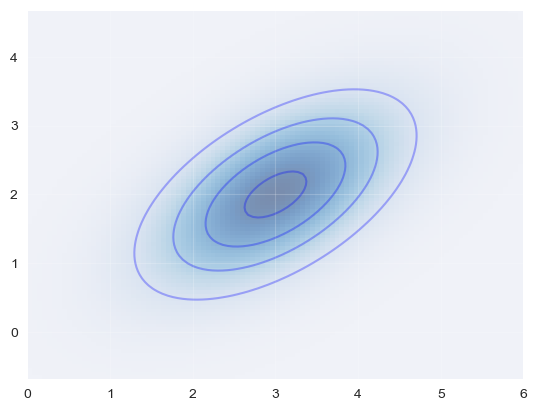

In [111]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    #ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

In [112]:
# read the data into a dataframe
df = pd.read_csv("heart.csv", sep="\t")

# find and replace missing values with median (for numerical features) or mode (for categorical features)
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# for each numerical feature find the median and replace missing values with it
for feature in numerical_features:
    median = df[feature].median()
    df[feature].fillna(median, inplace=True)

# for each categorical feature find the mode and replace missing values with it
for feature in categorical_features:
    mode = df[feature].mode()[0]
    df[feature].fillna(mode, inplace=True)

# print basic info about the data after replacing missing values
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.405941    0.686469    0.953795  131.630363  245.848185    0.148515   
std      8.964069    0.464696    1.031544   17.358758   51.604360    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.524752  149.610561    0.326733    1.036634    1.399340    0.729373   
std      0.519693   22.8586

In [113]:
# split the data into healthy and disease
healthy_df = df[df["target"] == 0]
disease_df = df[df["target"] == 1]

# find the mean and standard deviation of each numerical feature for healthy and disease populations
healthy_means = healthy_df[numerical_features].mean()
healthy_stds = healthy_df[numerical_features].std()
disease_means = disease_df[numerical_features].mean()
disease_stds = disease_df[numerical_features].std()

In [114]:
# Using confidence intervals determine for which numerical features
# you can state with confidence of 95% that the healthy population
# (target = 0) mean is larger/smaller than the disease population (target = 1) mean.

# calculate the t-value and p-value for each numerical feature
for feature in numerical_features:
    t, p_value = ss.ttest_ind(healthy_df[feature], disease_df[feature])
    # if p-value is less than 0.05, we can state with confidence of 95% that the healthy population mean is different from the disease population mean
    if p_value < 0.05:
        if healthy_means[feature] > disease_means[feature]:
            print(f"{feature} - healthy mean is larger than disease mean")
        else:
            print(f"{feature} - healthy mean is smaller than disease mean")


age - healthy mean is larger than disease mean
trestbps - healthy mean is larger than disease mean
thalach - healthy mean is smaller than disease mean
oldpeak - healthy mean is larger than disease mean


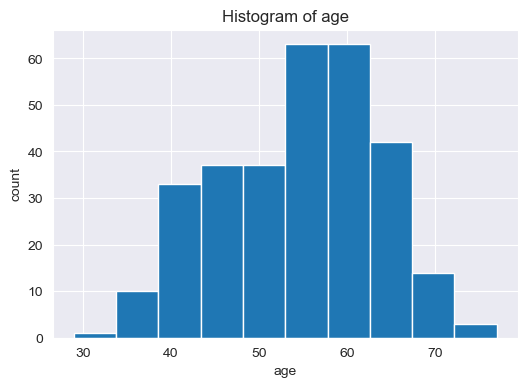

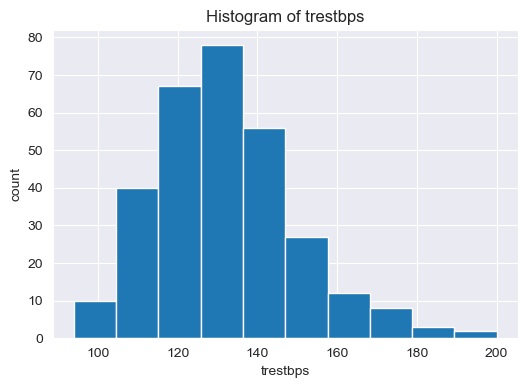

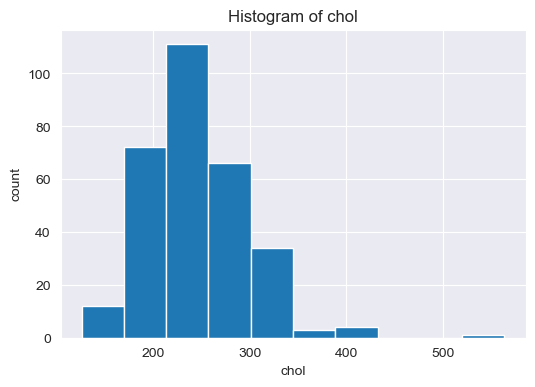

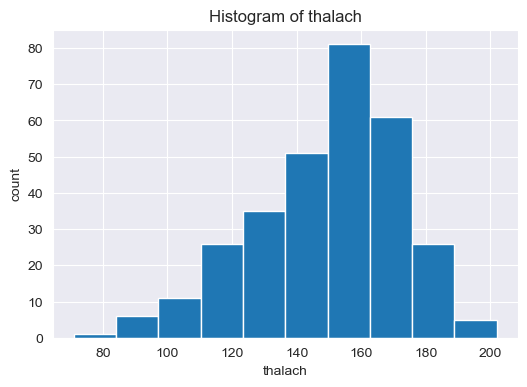

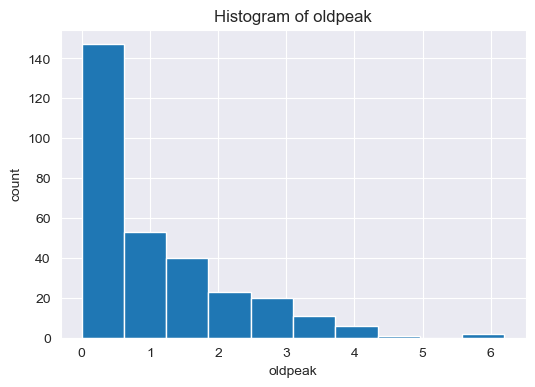

In [115]:
# Draw histograms for each numerical feature.
# Inspect the observed distributions and then use MLE to plot,
# on the same figures, fits of the distributions.
import matplotlib.pyplot as plt
from scipy.stats import norm


# draw histograms for each numerical feature, add labels and title
for feature in numerical_features:
    plt.figure(figsize=(6,4))
    plt.hist(df[feature], label=feature)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(f"Histogram of {feature}")
    plt.show()




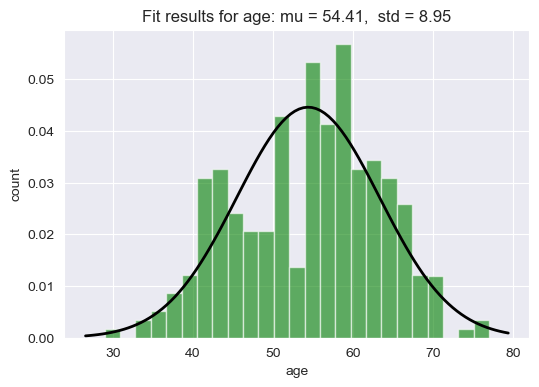

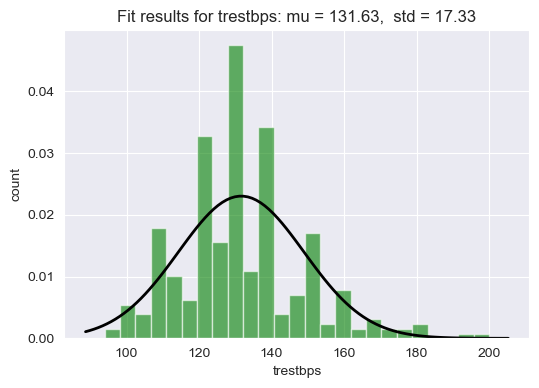

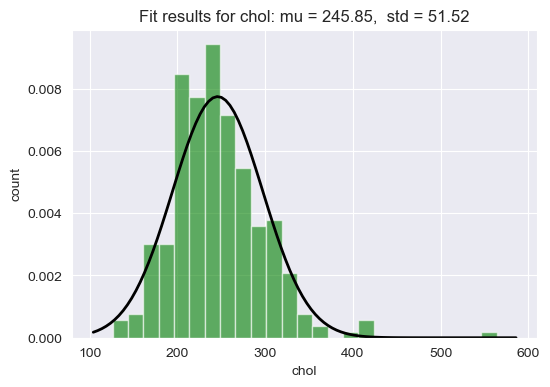

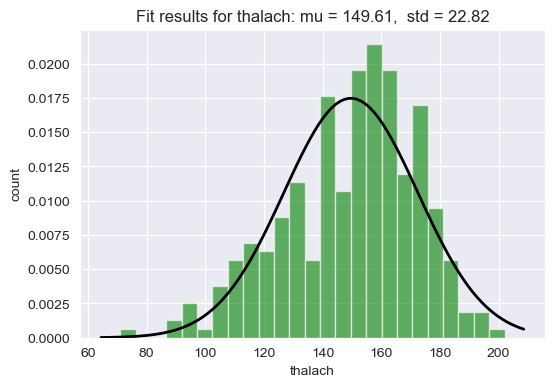

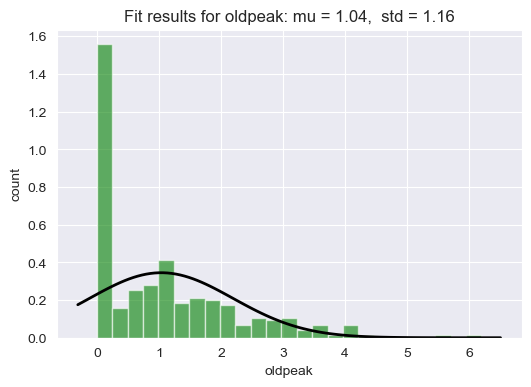

In [116]:
# use MLE to plot with labels and titles, on the same figures, fits of the distributions
for feature in numerical_features:
    plt.figure(figsize=(6,4))
    mu, std = norm.fit(df[feature])
    plt.hist(df[feature], bins=25, density=True, alpha=0.6, color="g")
    plt.xlabel(feature)
    plt.ylabel("count")
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p_value = norm.pdf(x, mu, std)
    plt.plot(x, p_value, "k", linewidth=2)
    title = f"Fit results for {feature}: mu = {mu:.2f},  std = {std:.2f}"
    plt.title(title)
    plt.show()

In [117]:
# For each pair of numerical feature, calculate correlations
# and indicate whether you find them significant.

significant_correlations = {}
# find significant correlations using p-value
for feature1 in numerical_features:
    for feature2 in numerical_features:
        if feature1 != feature2:
            corr, p_value = ss.pearsonr(df[feature1], df[feature2])
            if p_value < 0.05 and (feature2, feature1) not in significant_correlations:
                print(f"{feature1} and {feature2} are significantly correlated")
                significant_correlations[(feature1, feature2)] = (corr, p_value)


age and trestbps are significantly correlated
age and chol are significantly correlated
age and thalach are significantly correlated
age and oldpeak are significantly correlated
trestbps and chol are significantly correlated
trestbps and oldpeak are significantly correlated
thalach and oldpeak are significantly correlated


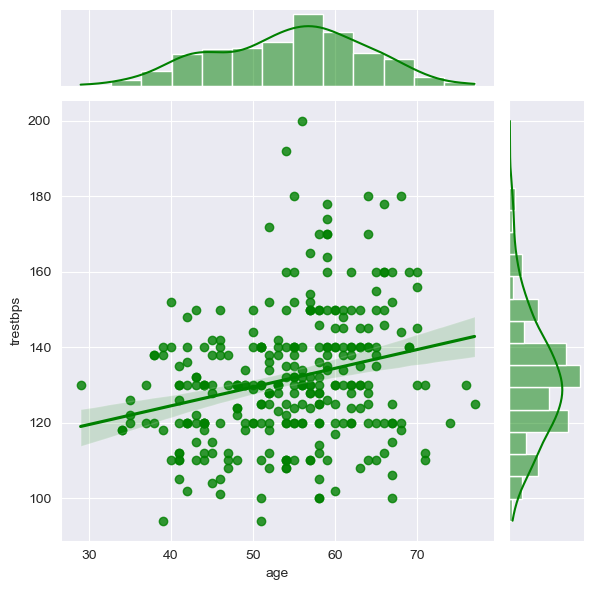

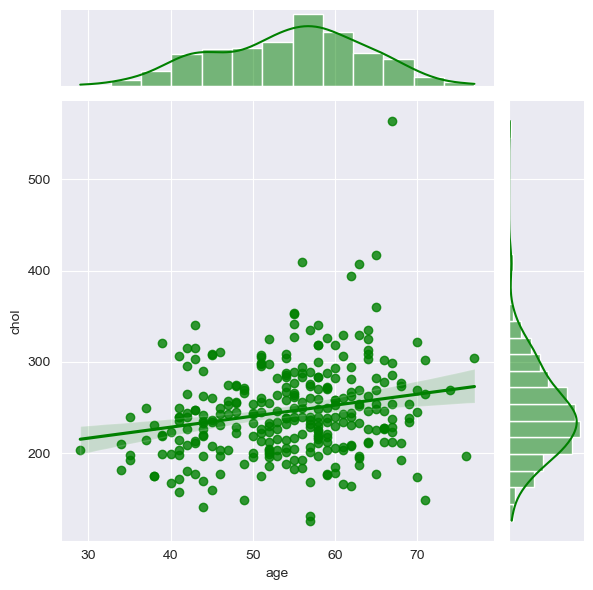

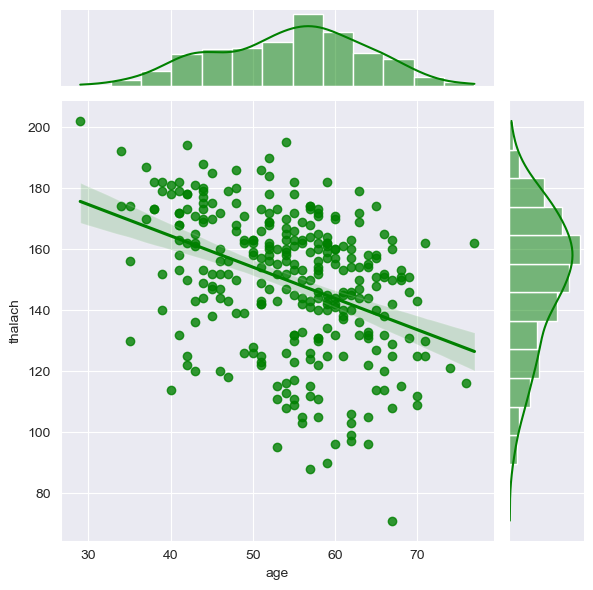

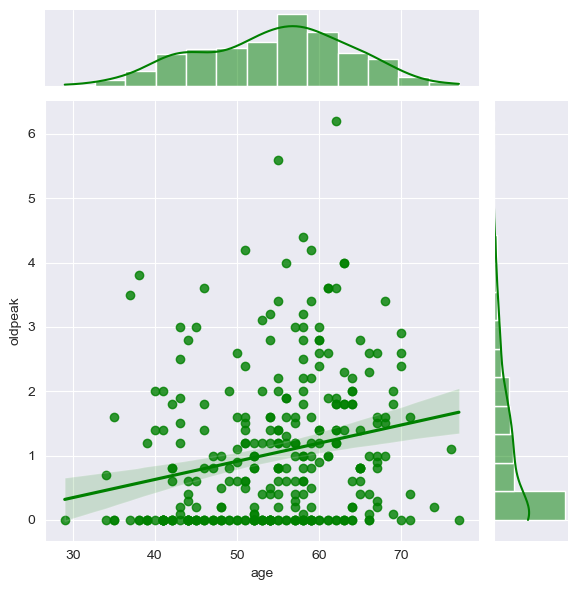

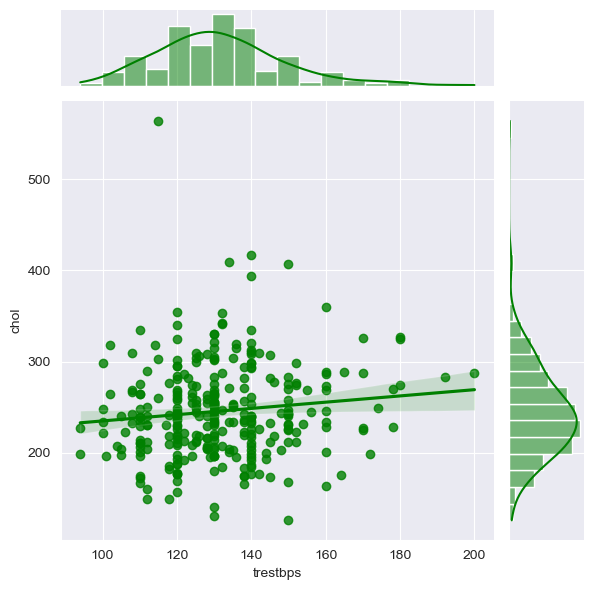

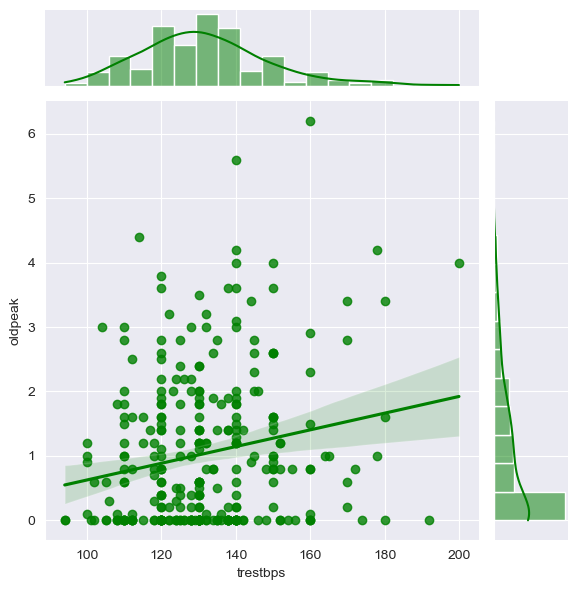

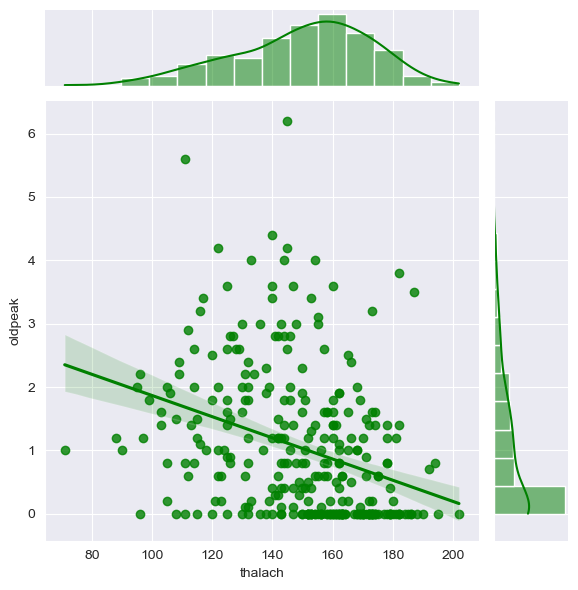

In [118]:
# For selected pairs, with significant correlations,
# draw joint plot with marginal histograms (see Seaborn joint plot)
import seaborn as sns
for pair in significant_correlations:
    sns.jointplot(x=pair[0], y=pair[1], data=df, kind="reg", color="g")
    plt.show()

C:\Users\baruc\AppData\Local\Temp\ipykernel_25780\378932454.py:16: UserWarning: No contour levels were found within the data range.
  ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),


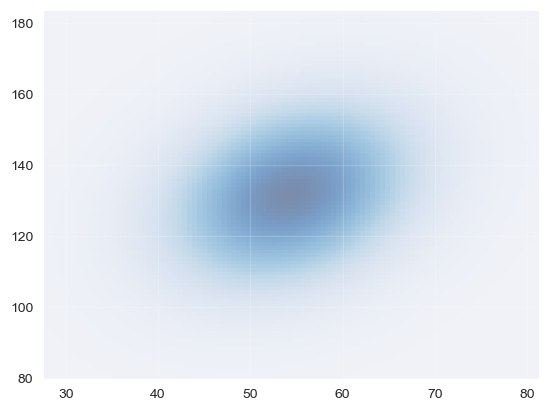

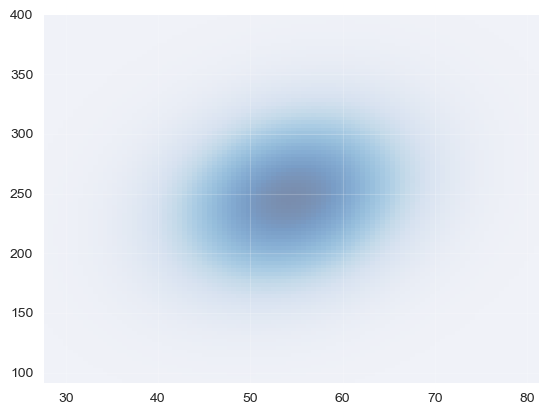

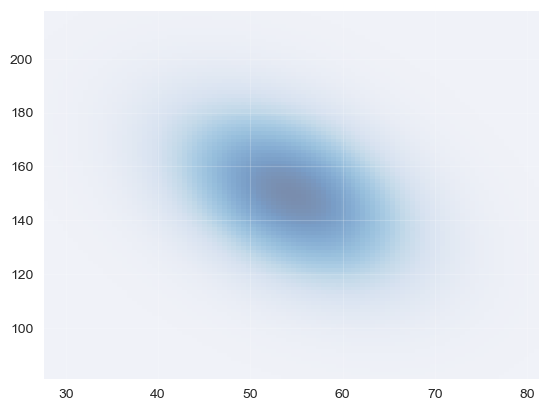

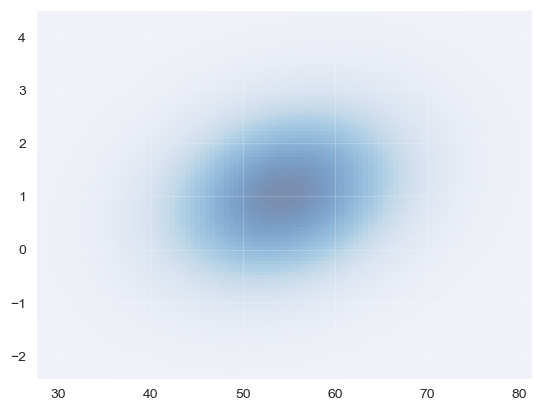

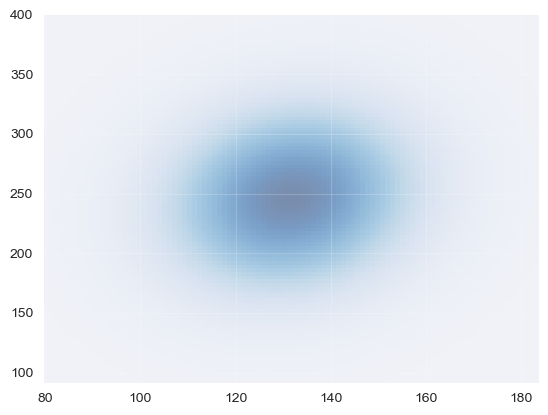

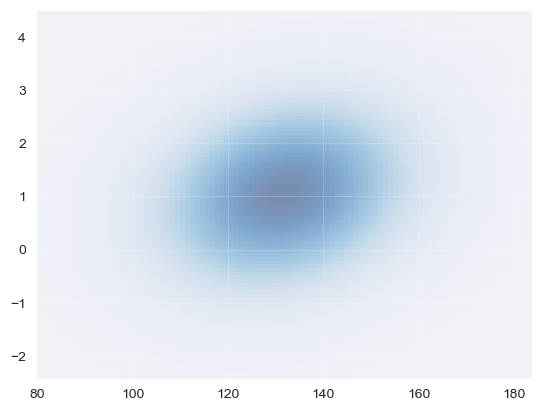

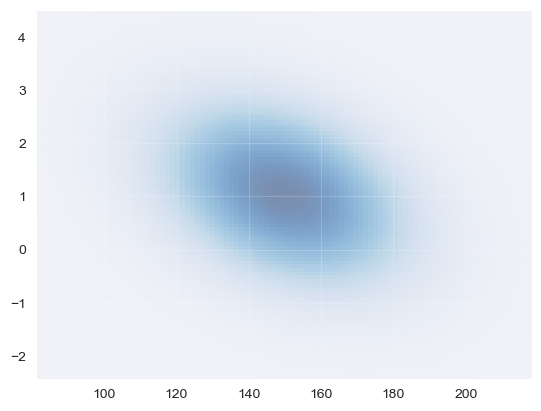

In [119]:
# find bivariate normal fits.
# Then use the example code to draw plots of the bivariate pdfs.
for pair in significant_correlations:
    # find the mean and covariance matrix
    means = [df[pair[0]].mean(), df[pair[1]].mean()]
    cov = np.cov(df[pair[0]], df[pair[1]])
    # plot the bivariate pdf
    plot_2d_Gaussian_pdf(means, cov)

In [120]:
# Are there pairs that are significantly correlated in males but not in females?
# The opposite? How about healthy vs disease? Can you graphically represent this?

# split the data to male and female
df_male = df[df["sex"] == 1]
df_female = df[df["sex"] == 0]

significant_correlations_males = {}
significant_correlations_females = {}
# find significant correlations using p-value
for feature1 in numerical_features:
    for feature2 in numerical_features:
        if feature1 != feature2:
            # check for male
            corr_male, p_value_male = ss.pearsonr(df_male[feature1], df_male[feature2])
            if p_value_male < 0.05 and (feature2, feature1) not in significant_correlations_males:
                #print(f"{feature1} and {feature2} are significantly correlated with males")
                significant_correlations_males[(feature1, feature2)] = (corr_male, p_value_male)
            # check for female
            corr_female, p_value_female = ss.pearsonr(df_female[feature1], df_female[feature2])
            if p_value_female < 0.05 and (feature2, feature1) not in significant_correlations_females:
                #print(f"{feature1} and {feature2} are significantly correlated with females")
                significant_correlations_females[(feature1, feature2)] = (corr_female, p_value_female)

In [121]:
# check and print features that are correlated with male and not female
for pair in significant_correlations_males:
    if pair not in significant_correlations_females:
        print(f"{pair[0]} and {pair[1]} are significantly correlated with males but not with females")

# check and print features that are correlated with female and not male
for pair in significant_correlations_females:
    if pair not in significant_correlations_males:
        print(f"{pair[0]} and {pair[1]} are significantly correlated with females but not with males")

trestbps and oldpeak are significantly correlated with females but not with males


In [122]:
# split the data to healthy and disease
df_healthy = df[df["target"] == 0]
df_disease = df[df["target"] == 1]

significant_correlations_healthy = {}
significant_correlations_disease = {}

# find significant correlations using p-value
for feature1 in numerical_features:
    for feature2 in numerical_features:
        if feature1 != feature2:

            # check for healthy
            corr_healthy, p_value_healthy = ss.pearsonr(df_healthy[feature1], df_healthy[feature2])
            if p_value_healthy < 0.05 and (feature2, feature1) not in significant_correlations_healthy:
                #print(f"{feature1} and {feature2} are significantly correlated with healthy")
                significant_correlations_healthy[(feature1, feature2)] = (corr_healthy, p_value_healthy)

            # check for disease
            corr_disease, p_value_disease = ss.pearsonr(df_disease[feature1], df_disease[feature2])
            if p_value_disease < 0.05 and (feature2, feature1) not in significant_correlations_disease:
                #print(f"{feature1} and {feature2} are significantly correlated with disease")
                significant_correlations_disease[(feature1, feature2)] = (corr_disease, p_value_disease)

In [123]:
# check features that are correlated with healthy and not disease
for pair in significant_correlations_healthy:
    if pair not in significant_correlations_disease:
        print(f"{pair[0]} and {pair[1]} are significantly correlated with healthy but not with disease")

# check features that are correlated with disease and not healthy
for pair in significant_correlations_disease:
    if pair not in significant_correlations_healthy:
        print(f"{pair[0]} and {pair[1]} are significantly correlated with disease but not with healthy")

age and chol are significantly correlated with disease but not with healthy
age and thalach are significantly correlated with disease but not with healthy
age and oldpeak are significantly correlated with disease but not with healthy
trestbps and oldpeak are significantly correlated with disease but not with healthy


In [124]:
# graphically represent this:
def plot_jointplot(significant_correlations=significant_correlations, data=df, title="significant correlations"):
    # plot the male and female significant_correlations_females
    for pair in significant_correlations:
        sns.jointplot(x=pair[0], y=pair[1], data=data, kind="reg", color="g")
        plt.title(title)
        plt.xlabel(pair[0])
        plt.ylabel(pair[1])
        plt.show()

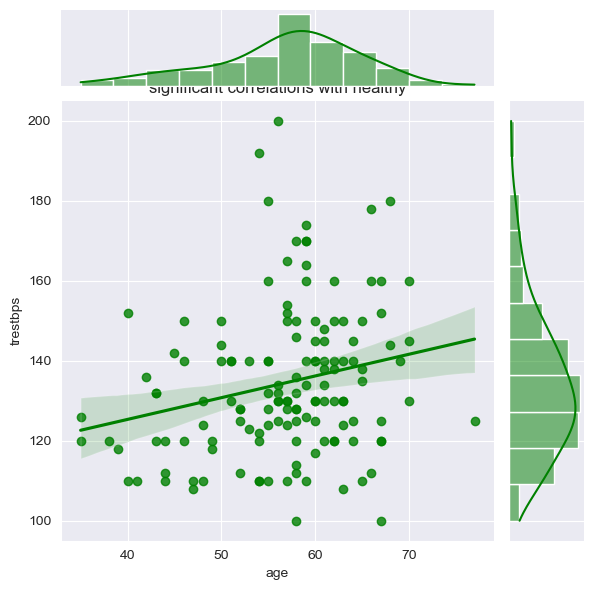

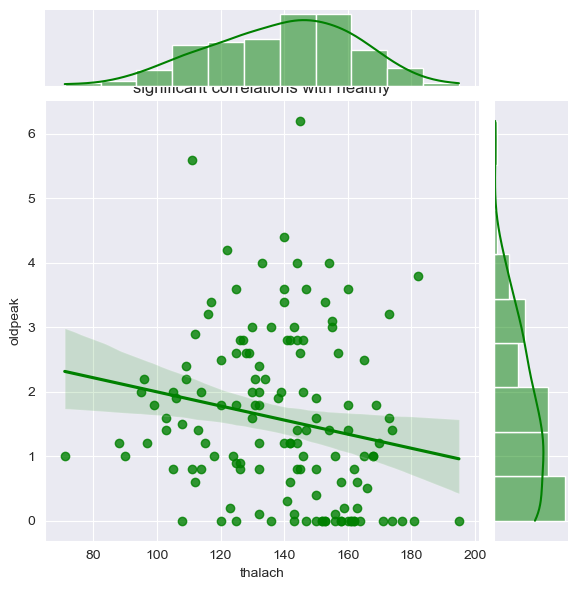

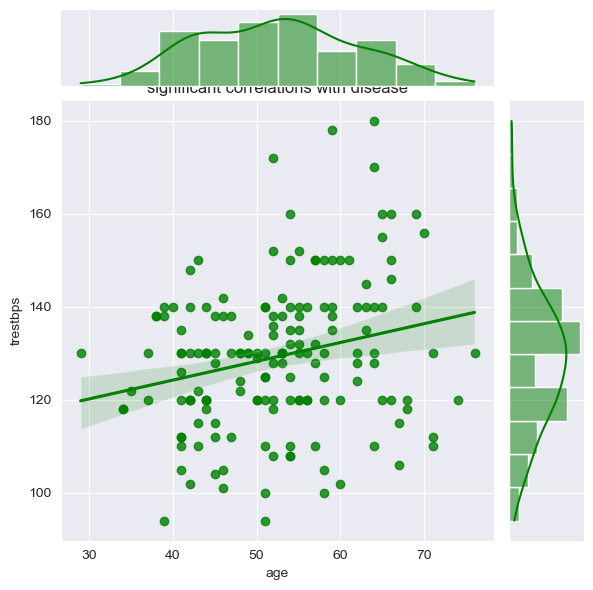

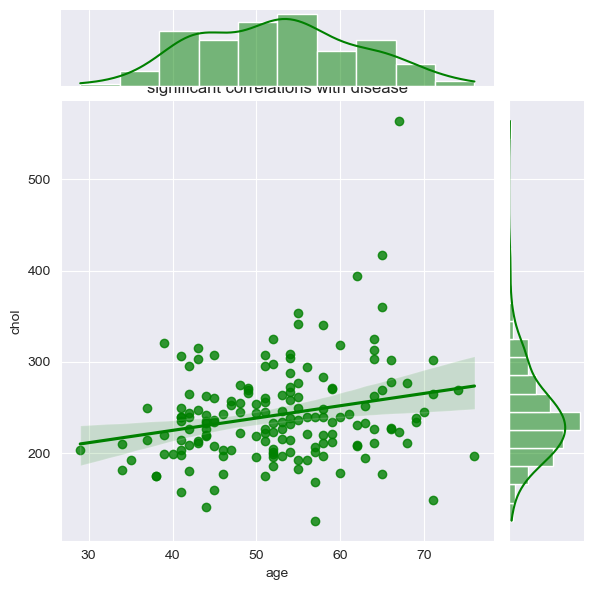

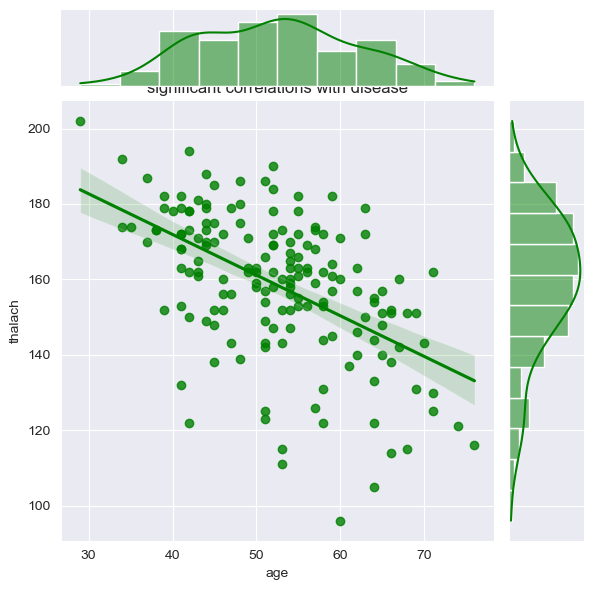

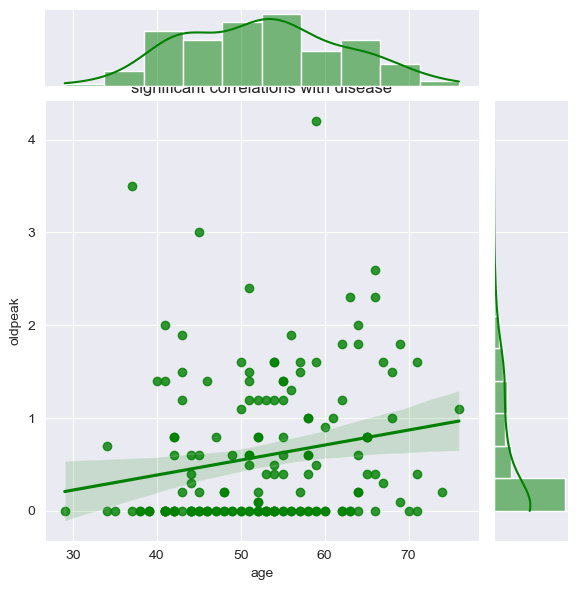

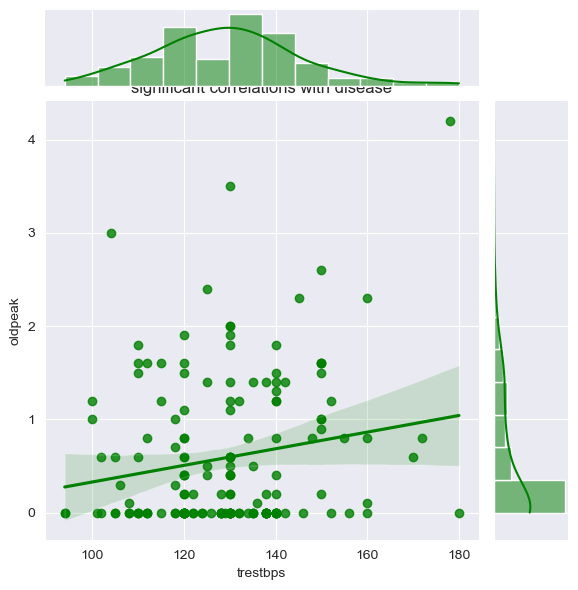

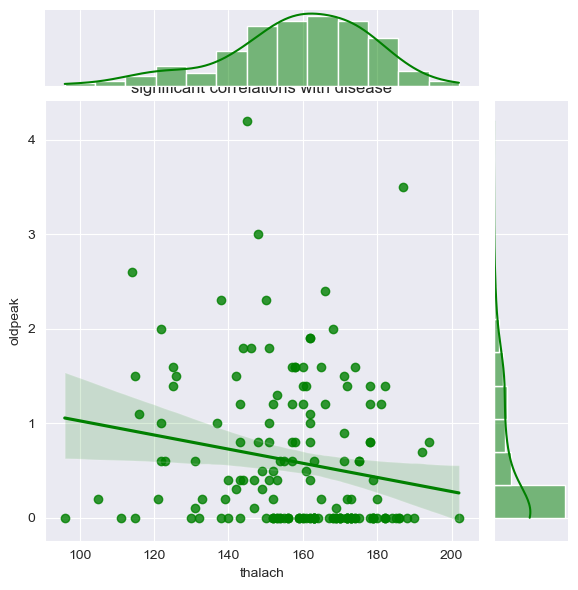

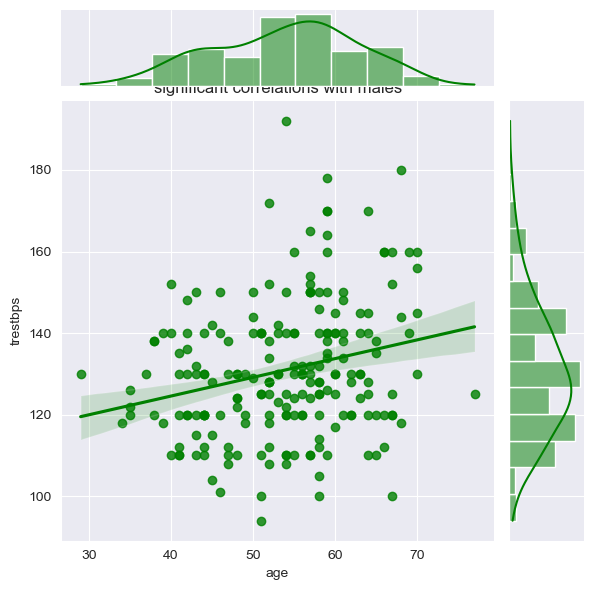

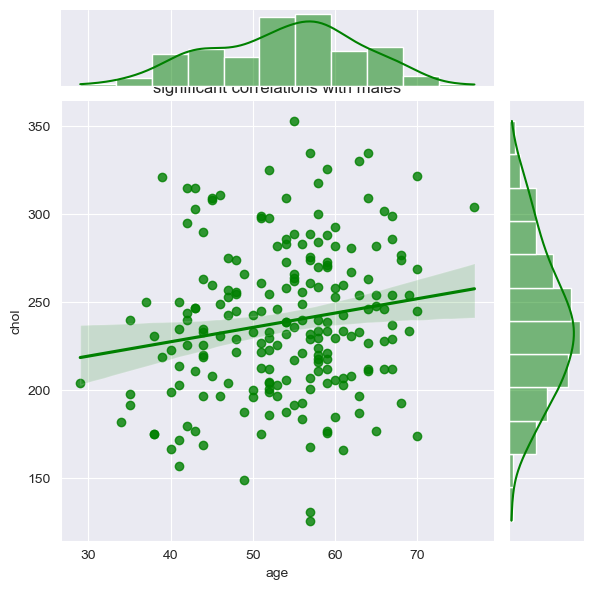

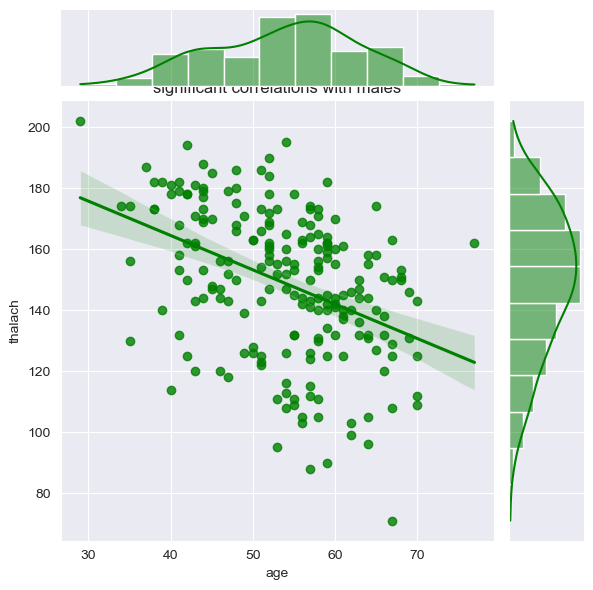

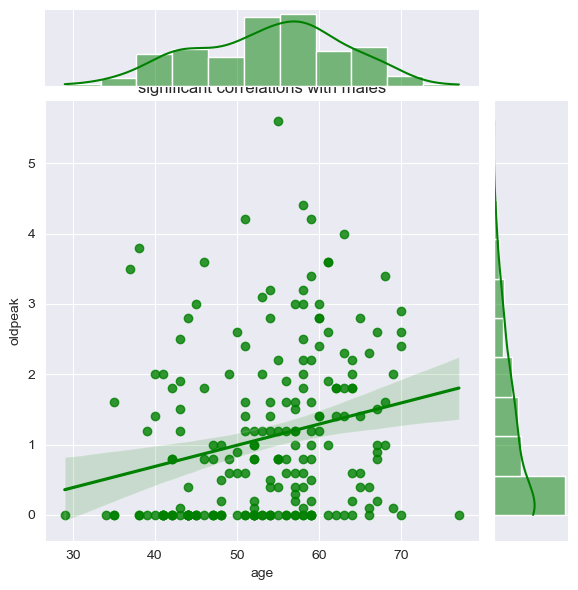

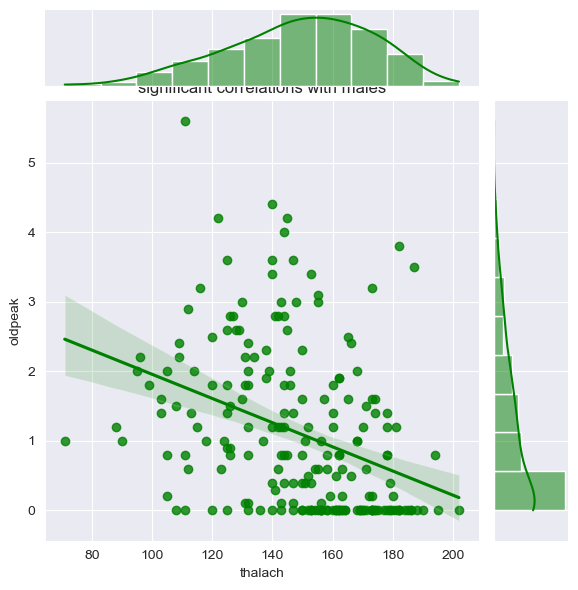

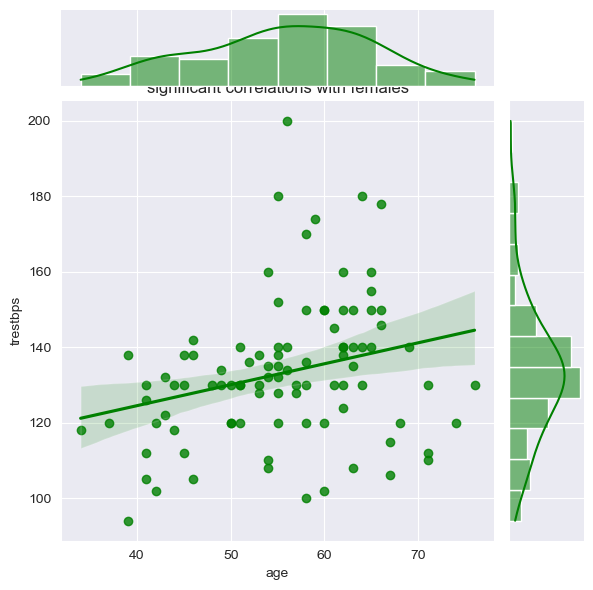

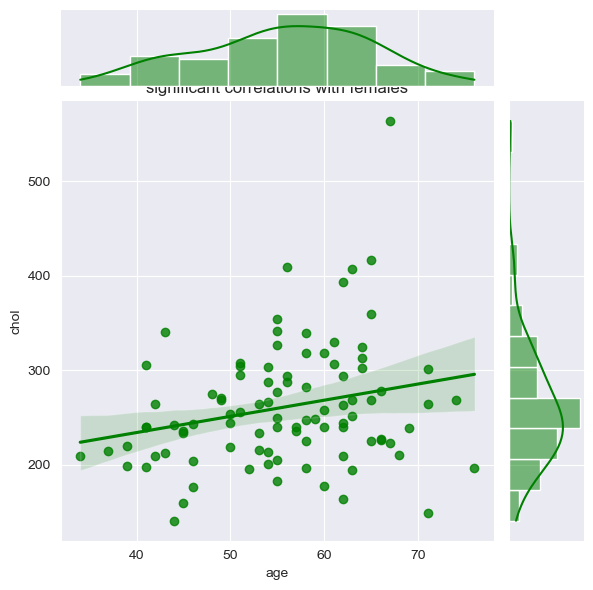

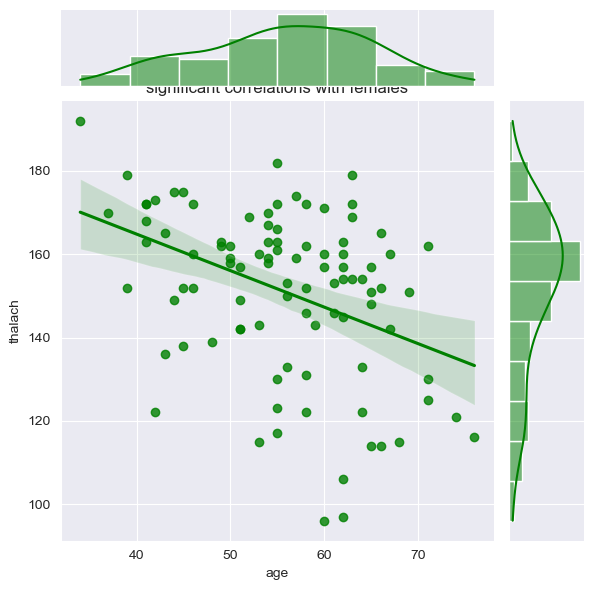

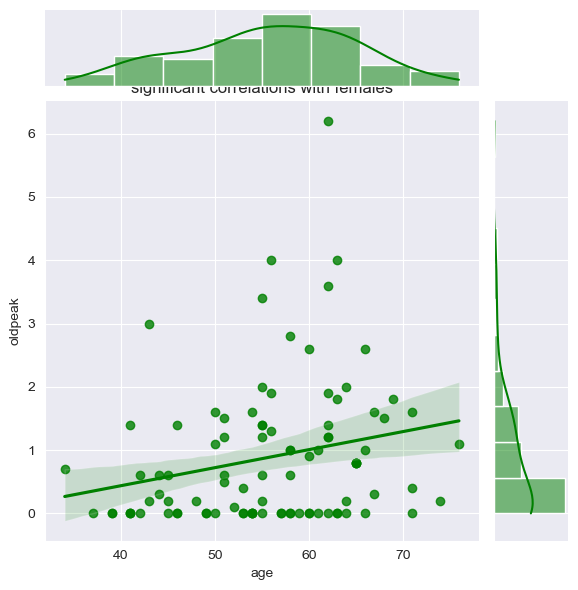

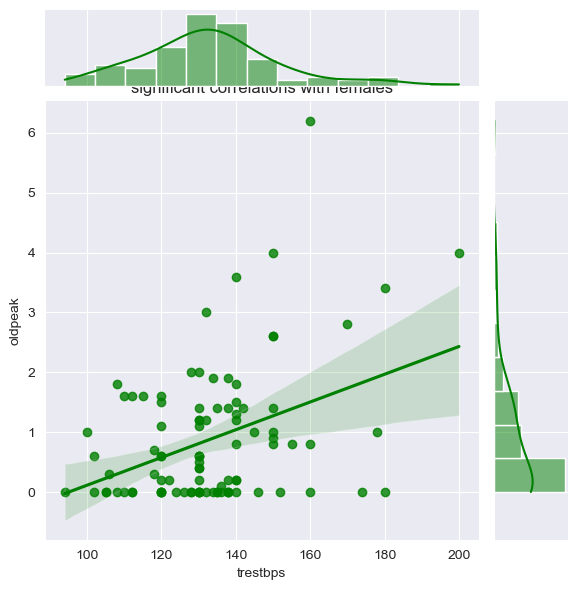

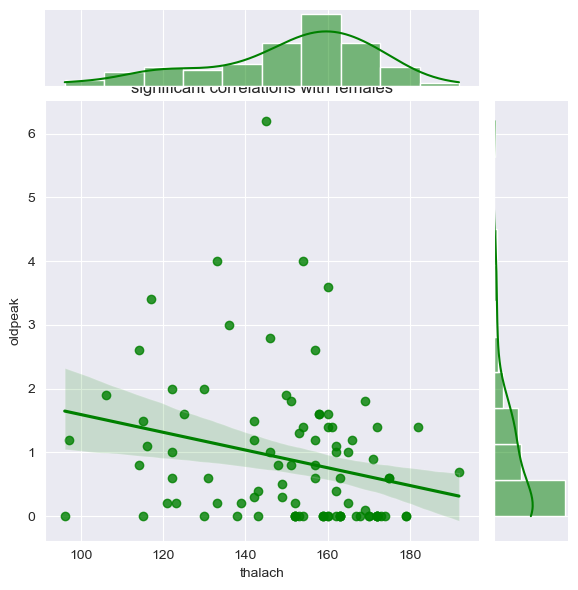

In [125]:
# plot the healthy and disease significant_correlations_healthy
plot_jointplot(significant_correlations_healthy, df_healthy, "significant correlations with healthy")


# plot the healthy and disease significant_correlations_disease
plot_jointplot(significant_correlations_disease, df_disease, "significant correlations with disease")


# plot the male and female significant_correlations_males
plot_jointplot(significant_correlations_males, df_male, "significant correlations with males")


# plot the male and female significant_correlations_females
plot_jointplot(significant_correlations_females, df_female, "significant correlations with females")


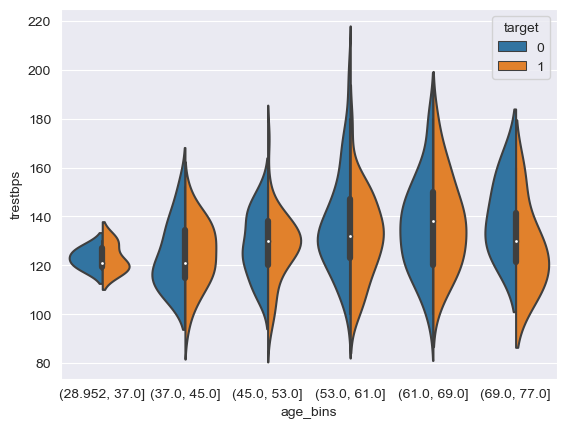

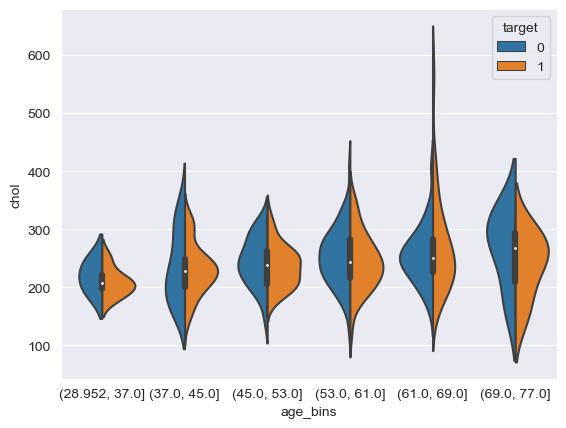

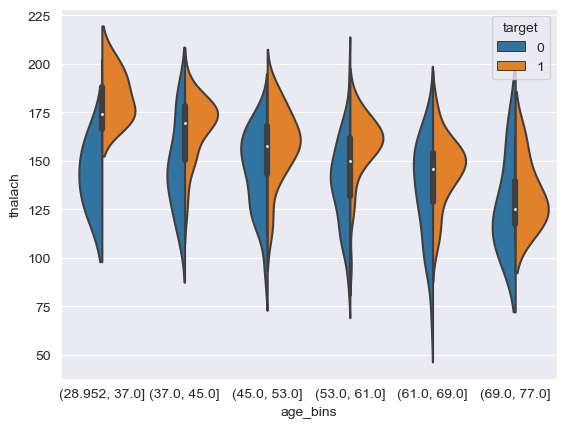

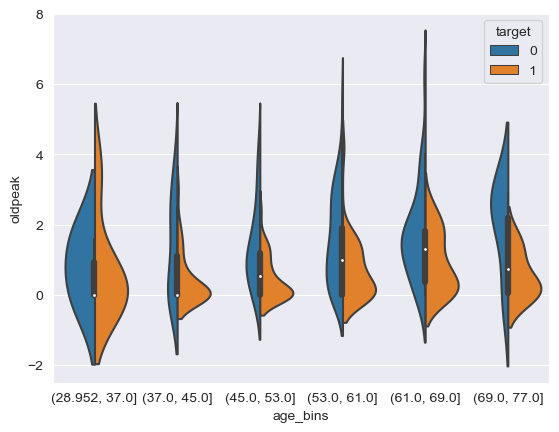

In [126]:
# For each numerical feature, except age, plot the distribution for this feature against bins of age.
# In each bin provide a split violin plot, with different colors for healthy and disease.

# create bins of age
df["age_bins"] = pd.cut(df["age"], bins=6) # create bins of age

for feature in numerical_features:
    if feature != "age":
        # plot the distribution for this feature against bins of age
        sns.violinplot(x="age_bins", y=feature, hue="target", data=df, split=True)
        plt.show()

#### add my own question
i will explore the relationship between chest pain type and heart disease.


Contingency table of chest pain type and heart disease:
target    0   1
cp             
0.0     104  41
1.0       9  41
2.0      18  67
3.0       7  16


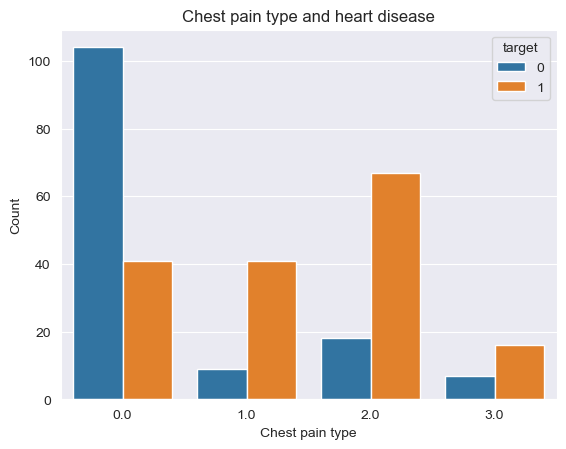

Pearson correlation: 0.4222888884794244, p-value: 1.5575593295503603e-14
Spearman correlation: 0.45021211721187926, p-value: 1.5784440372825237e-16
Kendall correlation: 0.42066387467106336, p-value: 5.1230853681980794e-15


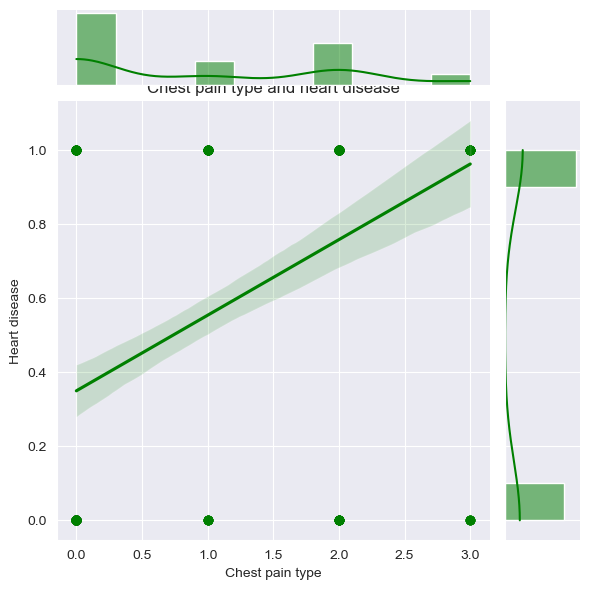

In [127]:
# explore the relationship between chest pain type and heart disease.
target = df["target"]
cp = df["cp"]

# create a contingency table of chest pain type and heart disease
contingency_table = pd.crosstab(cp, target)
print("Contingency table of chest pain type and heart disease:")
print(contingency_table)

# plot the relationship between chest pain type and heart disease
sns.countplot(x=cp, hue=target)
plt.title("Chest pain type and heart disease")
plt.xlabel("Chest pain type")
plt.ylabel("Count")
plt.show()

# check if the chest pain type and heart disease are correlated
correlated, p_value = ss.pearsonr(cp, target)
print(f"Pearson correlation: {correlated}, p-value: {p_value}")
correlated, p_value = ss.spearmanr(cp, target)
print(f"Spearman correlation: {correlated}, p-value: {p_value}")
correlated, p_value = ss.kendalltau(cp, target)
print(f"Kendall correlation: {correlated}, p-value: {p_value}")

# joint plot of chest pain type and heart disease
sns.jointplot(x=cp, y=target, data=df, kind="reg", color="g")
plt.title("Chest pain type and heart disease")
plt.xlabel("Chest pain type")
plt.ylabel("Heart disease")
plt.show()

### Question 3 - Heavy Tailed Distributions and the Exponential Distribution (16 points)

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

To determine if the standard log-normal distribution has a heavy right tail, we can calculate the limit of the probability of X being greater than x as x approaches infinity. Using the definitions provided, we can express the limit as:

$$ \lim_{x\to\infty} e^{tx}P(X>x)= \lim_{x\to\infty} e^{tx}P(e^Z>x)= \lim_{x\to\infty} e^{tx}P(Z>lnx)= \lim_{x\to\infty} e^{tx}[1 - \phi(lnx)]= \lim_{x\to\infty} \frac{\phi(-lnx)}{e^{-tx}} $$

Applying L'Hôpital's rule, we can simplify this limit to:

$$\lim_{x\to\infty}\frac{1}{\sqrt{2\pi}t}\frac{e^{tx-\frac{\ln^{2}x}{2}}}{x}$$

And further to:

$$\lim_{x\to\infty}-\frac{\left(t-\frac{\ln x}{x}\right)}{\sqrt{2\pi}t}e^{x\left(t-\frac{\ln^{2}x}{2x}\right)}\underset{\frac{\ln x}{x}\rightarrow0}{=}\frac{t-0}{\sqrt{2\pi}t}e^{\infty\left(t-0\right)}\underset{t>0}{=}\infty$$

This limit is infinity, which confirms that the standard log-normal distribution has a heavy right tail.


### Special Properties of the Exponential Distribution

Let $X_1 \sim exp(\lambda_1)$ and $X_2 \sim exp(\lambda_2)$ be two independent exponential random variables.

Calculate $P(X_1 < X_2)$.

### Special Properties of the Exponential Distribution

Let X1 ~ exp(λ1) and X2 ~ exp(λ2) be two independent exponential random variables.

Calculate P(X1 < X2).
P(X1 < X2) = ∫0x P( X1 = x | X2 > x ) dx = ∫0x P(X1 = x) P(X2>x) dx = ∫0x fX1(x) (1 − FX2(x)) dx

Note:
FX2(x) = ∫0x fX2(t)dt = ∫0x λ2 e−λ2t dt = 1−e−λ2x

Now simplify the integrand and combine with the above note:

fX1(x) (1 − FX2(x)) = λ1 e−λ1x (1 − (1−e−λ2x)) = λ1 e−λ1x e−λ2x = λ1 e−(λ1+λ2)x


∫0∞ λ1 e−(λ1+λ2)x dx = λ1  (1/(λ1+λ2))
##  P(X1 < X2) = λ1/(λ1 + λ2)


### Question 4 - CLT for Markov chains (16 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [128]:
# construct the transition matrix
T = np.array([[0.4, 0.2, 0.1, 0, 0.1, 0.2],
                [0.2, 0.4, 0.2, 0.1, 0, 0.1],
                [0.1, 0.2, 0.4, 0.2, 0.1, 0],
                [0, 0.1, 0.2, 0.4, 0.2, 0.1],
                [0.1, 0, 0.1, 0.2, 0.4, 0.2],
                [0.2, 0.1, 0, 0.1, 0.2, 0.4]])

# construct the initial distribution
init_dist = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

In [129]:
# construct the trajectories
traj = np.zeros((1000, 30))
for i in range(1000):
    traj[i, 0] = np.random.choice(np.arange(6), p=init_dist)
    for j in range(1, 30):
        traj[i, j] = np.random.choice(np.arange(6), p=T[int(traj[i, j-1]), :])

# What do you expect the average value of all 30 numbers in a trajectory to be?
print("I would expect the average value of all 30 numbers to be around 3.5")

I would expect the average value of all 30 numbers to be around 3.5


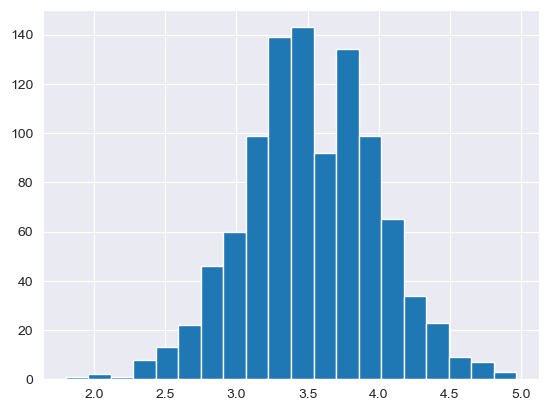

In [130]:
# compute the average value of each trajectory
avg_traj_30 = np.mean(traj, axis=1) + 1 # +1 to convert 0-5 to 1-6

# plot the histogram
plt.hist(avg_traj_30, bins=20)
plt.show()



In [131]:
# What does the distribution look like?
print("The Distribution looks like the Normal distribution")

# compute the empirical mean and std
print(" Empirical mean: ", np.mean(avg_traj_30))
print(" Empirical std: ", np.std(avg_traj_30))

The Distribution looks like the Normal distribution
 Empirical mean:  3.5194666666666667
 Empirical std:  0.4652274760205425


##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

I would expect the average value of all 500 numbers to be around 3.5


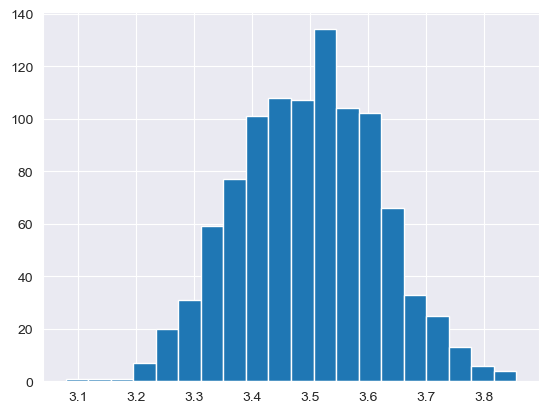

In [132]:
# construct the trajectories
traj = np.zeros((1000, 500))
for i in range(1000):
    traj[i, 0] = np.random.choice(np.arange(6), p=init_dist)
    for j in range(1, 500):
        traj[i, j] = np.random.choice(np.arange(6), p=T[int(traj[i, j-1]), :])

# What do you expect the average value of all 500 numbers in a trajectory to be?
print("I would expect the average value of all 500 numbers to be around 3.5")

# compute the average value of each trajectory
avg_traj_500 = np.mean(traj, axis=1) + 1 # +1 to covert 0-5 to 1-6

# plot the histogram
plt.hist(avg_traj_500, bins=20)
plt.show()



In [133]:
# What does the distribution look like?
print("The Distribution looks like the Normal distribution")

# compute the empirical mean and std
print(" Empirical mean: ", np.mean(avg_traj_500))
print(" Empirical std: ", np.std(avg_traj_500))

The Distribution looks like the Normal distribution
 Empirical mean:  3.4980420000000003
 Empirical std:  0.1199093083792914


#### 4.C
Draw normal fit curves on your two histograms.

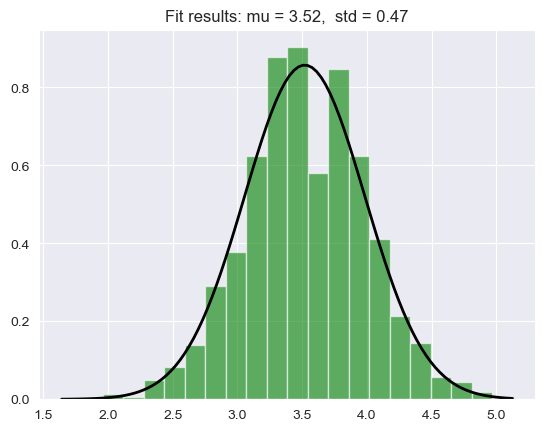

In [134]:
# Draw normal fit curves on your two histograms.
# fit a normal distribution to the data avg_traj_30:
mu, std = norm.fit(avg_traj_30)
# plot the histogram
plt.hist(avg_traj_30, bins=20, density=True, alpha=0.6, color='g')
# plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

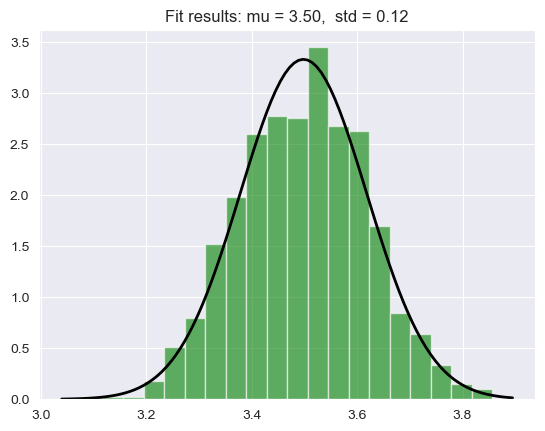

In [135]:
# fit a normal distribution to the data avg_traj_500:
mu, std = norm.fit(avg_traj_500)
# plot the histogram
plt.hist(avg_traj_500, bins=20, density=True, alpha=0.6, color='g')
# plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

In [136]:
def compute_cov(T, init_dist):
    # compute the expected values of X_0 and X_i
    E_X0 = np.dot(init_dist, np.arange(1, 7))
    cov_X0_Xi = np.zeros(500)
    for i in range(1, 501):
        E_Xi = np.dot(np.dot(init_dist,np.linalg.matrix_power(T, i)), np.arange(1, 7))
        E_X0X_i = np.dot(np.dot(init_dist,np.linalg.matrix_power(T, i)), np.arange(1, 7)**2)
        cov_X0_Xi[i-1] = E_X0X_i - E_X0*E_Xi

    return cov_X0_Xi

Cov(X_0, X_1) = 2.916666666666668
Cov(X_0, X_2) = 2.9166666666666696
Cov(X_0, X_3) = 2.916666666666668
Cov(X_0, X_4) = 2.916666666666668
Cov(X_0, X_5) = 2.916666666666666
Cov(X_0, X_6) = 2.916666666666668
Cov(X_0, X_7) = 2.916666666666668
Cov(X_0, X_8) = 2.9166666666666696
Cov(X_0, X_9) = 2.9166666666666714
Cov(X_0, X_10) = 2.9166666666666696
Cov(X_0, X_11) = 2.9166666666666714
Cov(X_0, X_12) = 2.9166666666666696
Cov(X_0, X_13) = 2.9166666666666696
Cov(X_0, X_14) = 2.9166666666666714
Cov(X_0, X_15) = 2.9166666666666714
Cov(X_0, X_16) = 2.9166666666666714
Cov(X_0, X_17) = 2.9166666666666714
Cov(X_0, X_18) = 2.9166666666666714
Cov(X_0, X_19) = 2.9166666666666714
Cov(X_0, X_20) = 2.9166666666666714
Cov(X_0, X_21) = 2.916666666666673
Cov(X_0, X_22) = 2.916666666666675
Cov(X_0, X_23) = 2.9166666666666767
Cov(X_0, X_24) = 2.916666666666673
Cov(X_0, X_25) = 2.916666666666675
Cov(X_0, X_26) = 2.9166666666666767
Cov(X_0, X_27) = 2.9166666666666767
Cov(X_0, X_28) = 2.916666666666675
Cov(X_0, X_2

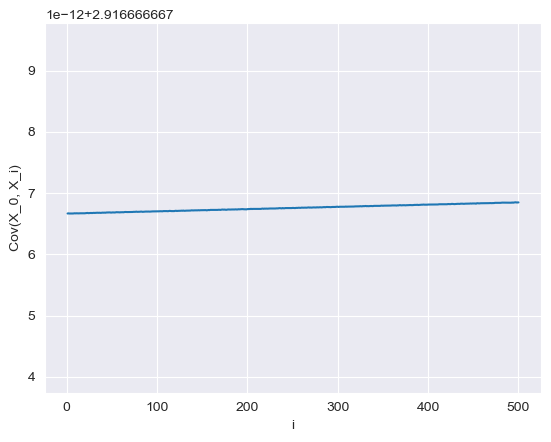

In [137]:
# Compute the values for our case.
cov = compute_cov(T, init_dist)
for i in range(500):
    print("Cov(X_0, X_{}) = {}".format(i+1, cov[i]))

# Plot the values of Cov(X_0,X_i) for i=1,..,500.
plt.plot(np.arange(1, 501), cov)
plt.xlabel("i")
plt.ylabel("Cov(X_0, X_i)")
plt.show()

### Question 5 - Distributions (16 Points)

Let $X$ be a random variable. Consider the number $q$ so that $P(X\le q)=0.8$ (assume that such a value exists).

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Denote the sorted observations by: $a_1 \le a_2 \le ... \le a_n$. Also assume that $n \ge 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $a_i \le q$. If $a_1 > q$ then $R = 0$.

1. What is $P(R = 0)$?
1. What is the distribution of $R$?
1. Given $n$, write code that computes an index $\lambda (n)$ so that $P(a_{\lambda (n)} \le q) \ge 0.9$ and $P(a_{\lambda (n)+1} \le q) < 0.9$.
1. Let $X \sim Unif(0,1)$, $q$ as above and $n=100$. Compute $\lambda (n)$ as above. Run 200 experiments that calculate $a_{\lambda (n)}$ for independent drawing from $X$. How many times did you observe $a_{\lambda (n)} \le q$?

#### Answer:


#### 1.
P(R = 0) = P(a1 > q) = P(x1 > q and .... xn > q) = P(x1 > q) * .... * P(xn > q) = 0.2 * ... * 0.2 = 0.2^n
this move is true P(x1 > q and .... xn > q) = P(x1 > q) * .... * P(xn > q) since x(vector) was sampled independently from X.

#### 2.
The distribution of R is the distribution of the largest index i such that a_i <= q.
Since the observations are sorted and independent,
R is distributed as the number of observations that fall below q among the first n observations.
So, R is distributed as a binomial distribution with parameters n and P(X <= q) = 0.8.
R ~ B(n, 0.8).

In [138]:
# 3
from scipy import stats

def lambda_n(n=100, q=0.8, threshold=0.9):
    # define R as a binomial random variable with n, p = P(X <= q) = 0.8
    R = stats.binom(n, q)
    for lambda_n in range(2, n):
        p_lambda_n = 1 - R.cdf(lambda_n - 1) # P(a_lambda(n) <= q) = P(R >= lambda_n) = 1 - P(R < lambda_n) = 1 - P(R <= lambda_n -1)
        p_lambda_n_plus_1 = 1 - R.cdf(lambda_n) # P(a_lambda(n)+1 <= q) = P(R >= lambda_n + 1) = = 1 - P(R <= lambda_n)
        if p_lambda_n >= threshold > p_lambda_n_plus_1:
            return lambda_n
    return None


In [139]:
# test lambda_n
print(lambda_n(n=100, q=0.8, threshold=0.9))

75


In [140]:
# 4. Let  X∼Unif(0,1),  q as above and  n=100. Compute  λ (n) as above. Run 200 experiments that calculate  a λ (n) for
# independent drawing from  X. How many times did you observe  a λ (n) ≤ q?

def experiment(n=100, q=0.8, threshold=0.9, num_experiments=200):
    lambda_n_value = lambda_n(n, q, threshold)
    count = 0
    for i in range(num_experiments):
        # draw n samples from a uniform distribution
        sample = stats.uniform.rvs(size=n)
        # sort the sample
        sample.sort()
        # check if a_lambda(n) <= q
        if sample[lambda_n_value] <= q:
            count += 1
    return count


In [141]:
num_experiments = 200
count = experiment(n=100, q=0.8, threshold=0.9, num_experiments=num_experiments)

print("a_lambda(n) <= q observed", count, "times out of", num_experiments, "experiments")
print("empirical probability of a_lambda(n) <= q is", count / num_experiments, "which is close to the theoretical probability of 0.9")

a_lambda(n) <= q observed 177 times out of 200 experiments
empirical probability of a_lambda(n) <= q is 0.885 which is close to the theoretical probability of 0.9
